In [43]:
!pip install tensorflow-datasets


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds


2023-02-14 14:38:52.540534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 14:38:52.700540: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-14 14:38:52.705386: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 14:38:52.705413: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [4]:
datos,metadatos=tfds.load(name='fashion_mnist',as_supervised=True,with_info=True)

2023-02-14 14:38:57.508610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-14 14:38:57.508646: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-14 14:38:57.508678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (javierfia-latitude3520): /proc/driver/nvidia/version does not exist
2023-02-14 14:38:57.509223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/home/javieria/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      a

In [5]:
data_train,data_test=datos['train'],datos['test']

In [6]:
name_of_class= metadatos.features['label'].names


In [7]:
name_of_class

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

data_train=data_train.map(normalizar)
data_test=data_test.map(normalizar)

data_train=data_train.cache()
data_test=data_test.cache()

2023-02-14 14:39:12.980021: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-02-14 14:39:12.980202: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


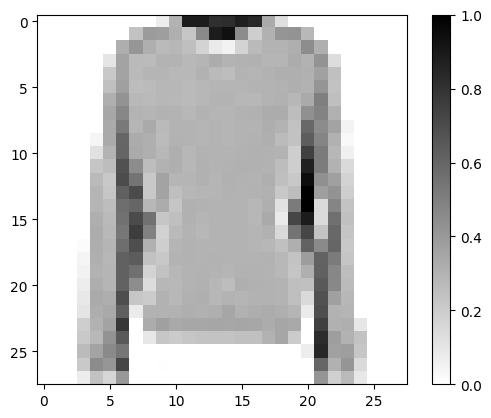

In [9]:
for imagen,etiqueta in data_train.take(1):
  break
imagen=imagen.numpy().reshape((28,28))
 
 
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
model=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28,1)),
 tf.keras.layers.Dense(50,activation=tf.nn.relu),
 tf.keras.layers.Dense(50,activation=tf.nn.relu),
 tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [53]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [54]:
num_examples=metadatos.splits['train'].num_examples
num_pruebas=metadatos.splits['test'].num_examples
print(num_examples)
print(num_pruebas)
size_batch=32
datosdeentrenamiento=data_train.repeat().shuffle(num_examples).batch(size_batch)
datosdetest=data_test.batch(size_batch)

60000
10000


In [55]:
import math
model.fit(datosdeentrenamiento,epochs=5,steps_per_epoch=math.ceil(num_examples/size_batch))

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5179 - accuracy: 0.8165
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3865 - accuracy: 0.8602
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3491 - accuracy: 0.8737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3293 - accuracy: 0.8797
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3107 - accuracy: 0.8859


In [56]:
for imagenes,etiquetas in data_test.take(1):
  imagenes=imagenes.numpy()
  etiquetas=etiquetas.numpy()
  predicciones=model.predict(imagenes)

2023-02-14 14:37:21.868574: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-02-14 14:37:21.868791: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: in user code:

    File "/home/javieria/Documents/cursos/CursoPracticasVS/.env/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/javieria/Documents/cursos/CursoPracticasVS/.env/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/javieria/Documents/cursos/CursoPracticasVS/.env/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/javieria/Documents/cursos/CursoPracticasVS/.env/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/javieria/Documents/cursos/CursoPracticasVS/.env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/javieria/Documents/cursos/CursoPracticasVS/.env/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 1), dtype=float32)
      • training=False
      • mask=None


2023-02-14 14:25:09.536614: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-02-14 14:25:09.536926: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: not enough values to unpack (expected 2, got 1)